<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# !pip install folium
import folium

Подготовим функции

In [2]:
def my_print(what):
    print('\033[1m' + '\033[94m' + what + '\033[0m')
    

def my_read(name):                                        # Загрузка датасетов
    try:
        df_read = pd.read_csv('/datasets/' + name)
    except:
        df_read = pd.read_csv(r'C:\Users\Admiral\Desktop\учеба\практикум\Проекты\Datasets\13_' + name)
    return df_read

Импортируем файлы

In [3]:
models = my_read('query_1.csv')
cities = my_read('query_3.csv')

Посмотрим на первые 8 строк

In [4]:
my_print('Таблица с моделями самолетов')
display(models.head(8))
my_print('Таблица с городами')
display(cities.head(8))

Таблица с моделями самолетов


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Таблица с городами


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000


Для удобочитаемости округлим среднее количество рейсов в день до 2 знаков

In [5]:
cities.average_flights = cities.average_flights.apply(lambda x: round(x, 2))

Обе таблицы отсортируем по количеству рейсов по убыванию

In [6]:
cities = cities.sort_values('average_flights', ascending=False).reset_index(drop=True)
models = models.sort_values('flights_amount', ascending=False).reset_index(drop=True)

Выведем общую информацию

In [7]:
my_print('Общая информация по таблице с моделями самолетов')
models.info()
print('\n')
my_print('Общая информация по таблице с городами')
cities.info()

Общая информация по таблице с моделями самолетов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Общая информация по таблице с городами
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


- В обоих таблицах пропуски отсутствуют. Тип данных корректный.
- В нашем распоряжении информация о количестве сделанных рейсов в сентябре 2018 года для 8 различных моделей самолетов:
    - Airbus A319-100 - французский узкофюзеляжный реактивный пассажирский самолет для авиалиний малой и средней протяжённости, вместительностью от 116 до 156 пассажиров в зависимоти от разделения на классы и дальностью полета 6850 км. Первый полет - 1995 год.
    - Airbus A321-200 - еще один французский узкофюзеляжный реактивный пассажирский самолет для авиалиний малой и средней протяжённости, вместительностью от 170 до 220 пассажиров и дальностью полета 5950 км. Первый полет - 1996 год.
    - Boeing 737-300 - американский реактивный ближне- и среднемагистральный узкофюзеляжный пассажирский самолет, вместительностью от 128 до 149 пассажиров и дальностью полета 4204 км. Первый полет - 1984 год.
    - Boeing 767-300 - американский реактивный двухдвигательный широкофюзеляжный пассажирский самолет для авиалиний средней и большой протяжённости, вместительностью от 218 до 350 пассажиров и дальностью полета 9700 км. Первый полет - 1986 год.
    - Boeing 777-300 - американский реактивный двухдвигательный широкофюзеляжный пассажирский самолет для авиалиний большой протяжённости, вместительностью от 368 до 451 пассажира и дальностью полета 7035 км. Первый полет - 1998 год.
    - Bombardier CRJ-200 - канадский узкофюзеляжный реактивный пассажирский самолет для региональных и местных авиалиний,  вместительностью 50 пассажиров и дальностью полета от 3045 до 3713 км. Первый полет - 1995 год.
    - Cessna 208 Caravan - американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Выпускается с 1984 года в различных модификациях (пассажирские, грузопассажирские, грузовые, самолёт-амфибия). Используется на авиалиниях малой протяжённости. Дальность полета 1200 км, количество пассажирских мест от 9 до 13.
    - Sukhoi SuperJet-100 - российский ближнемагистральный узкофюзеляжный пассажирский самолёт с двумя турбореактивными двигателями нового поколения, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. Первый полет - 2008 год.
- Так же имеется таблица с упорядоченными наименованиями городов России и средним количество рейсов, прибывающих в город за день в сентябре 2018 года. Всего в таблице 101 город.

Выведем статистические показатели

In [8]:
my_print('Статистические показатели количества рейсов для каждой модели самолетов за сентябрь 2018 года')
display(models.describe())
my_print('Статистические показатели среднего количества рейсов, прибывающих в город за день')
display(cities.describe())

Статистические показатели количества рейсов для каждой модели самолетов за сентябрь 2018 года


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Статистические показатели среднего количества рейсов, прибывающих в город за день


,average_flights
count,101.000000
mean,5.493663
std,13.119346
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870000
max,129.770000


В среднем в город прибывает 5 рейсов в день, при этом более 75% городов принимает не более 6 рейсов в день. Но имеются города с большими показателями количества рейсов. Выведем все города с средним количеством рейсов в день более 10.

In [9]:
my_print(f'Топ {len(cities.query("average_flights > 10"))} городов по среднему количеству рейсов в день')
display(cities.query('average_flights > 10'))

Топ 7 городов по среднему количеству рейсов в день


,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13


Как и ожидалось, в список попали самые крупные города России - Москва с 4-мя аэропортами и Санкт-Петербург, а так же еще 5 городов-миллионников. Проверим наличие дубликатов

Проверим количество городов

In [10]:
my_print(f'Общее количество городов с рейсами в день не более одного: {len(cities.query("average_flights == 1"))}')
display(cities.query('average_flights == 1'))

Общее количество городов с рейсами в день не более одного: 12


,city,average_flights
89,Усинск,1.0
90,Усть-Кут,1.0
91,Стрежевой,1.0
92,Анадырь,1.0
93,Братск,1.0
94,Благовещенск,1.0
95,Иваново,1.0
96,Ижевск,1.0
97,Петропавловск-Камчатский,1.0
98,Комсомольск-на-Амуре,1.0


In [11]:
my_print(f'Количесто дубликатов в таблице cities: {cities.duplicated("city").sum()}')

Количесто дубликатов в таблице cities: 0


Загрузим таблицу с координатами городов России и добавим координаты в таблицу с нашими городами

In [12]:
cities_with_coord = pd.read_csv('https://drive.google.com/uc?id=1UZ2LIKJjKdw_daPUXXWC9vuIU4Y48rKG')
cities_with_coord.rename(columns={'Город': 'city'}, inplace=True)
cities_with_coord = pd.merge(left=cities, right=cities_with_coord, on='city')
cities_with_coord.info()
display(cities_with_coord.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               101 non-null    object 
 1   average_flights    101 non-null    float64
 2   Регион             101 non-null    object 
 3   Федеральный округ  101 non-null    object 
 4   lat                101 non-null    float64
 5   lng                101 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


,city,average_flights,Регион,Федеральный округ,lat,lng
0,Москва,129.77,Москва,Центральный,55.753215,37.622504
1,Санкт-Петербург,31.16,Санкт-Петербург,Северо-Западный,59.939095,30.315868
2,Новосибирск,17.32,Новосибирская область,Сибирский,55.030199,82.920430
3,Красноярск,11.58,Красноярский край,Сибирский,56.010563,92.852572
4,Екатеринбург,11.32,Свердловская область,Уральский,56.838011,60.597465


Создадим интерактивную карту при помощи библиотеки Folium, на которой отметим все наши города с указанием региона и среднего количества рейсов в день

In [13]:
my_map = folium.Map(location=[54.901233, 99.026387], zoom_start = 3, tiles= 'Stamen Toner')

def color_change(flights):
    if(flights <= 3):
        return('lightgreen')
    elif(3 < flights < 6):
        return('green')
    elif(6 <= flights < 10):
        return('orange')
    else:
        return('red')

for lat, lon, name, region, av_fl in zip(cities_with_coord['lat'],\
                                         cities_with_coord['lng'],\
                                         cities_with_coord['city'],\
                                         cities_with_coord['Регион'],\
                                         cities_with_coord['average_flights']):
      
    folium.CircleMarker(location=[lat, lon], radius = np.log(av_fl) * 5, fill_color=color_change(av_fl),
                        color='pink', fill_opacity = 0.9,
                        popup = str(name + '. ' + region + '. ' + 'Среднее количество рейсов в день: ' + str(round(av_fl, 2))),
                        ).add_to(my_map)
    
display(my_map)

Наибольшее количество рейсов в день приходится на Центральный федеральный округ. В общем можно отметить что большее количество рейсов в день приходится на западную часть России, чем на восточную.

Напишем функцию для последующего вывода однотипных графиков

In [14]:
def my_bar(bar_x, bar_y, x_fig, y_fig, ttl, x_lbl, x_max, x_step):
    sns.set_style('darkgrid')
    plt.figure(figsize=(x_fig, y_fig))
    sns.barplot(x = bar_x, y = bar_y, orient='h')
    plt.title(ttl)
    plt.xlabel(x_lbl)
    plt.ylabel('')
    plt.xticks(np.arange(0, x_max, x_step))
    plt.show()

Выберем топ-10 городов по среднему количеству рейсов в день

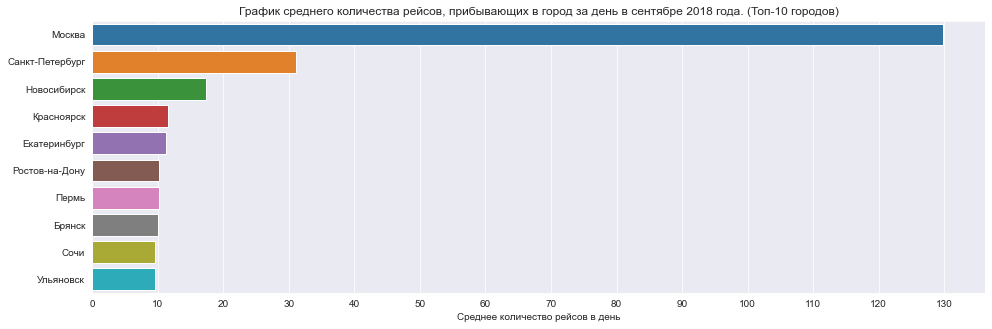

In [15]:
top_10 = cities.head(10)
my_bar(top_10.average_flights, top_10.city, 16, 5,\
       'График среднего количества рейсов, прибывающих в город за день в сентябре 2018 года. (Топ-10 городов)',\
       'Среднее количество рейсов в день', 131, 10)

В рейтинг попали:
- 7 городов-миллионников
- Сочи - популярное место для отдыха на море или на горнолыжном курорте
- Брянск - непонятно почему в данных среднее количество рейсов в день, прилетающих в Брянск с населением 399 579 чел., равно 10. К примеру среднее фактическое количество рейсов для Брянска, прилетающих в день для следующих двух недель начиная с 19.07.2021 составляет 3.71. Возможно данные неверны
- Ульяновск c населением 625 462 чел. и двумя аэропортами

Выведем график моделей самолетов с количеством рейсов за месяц

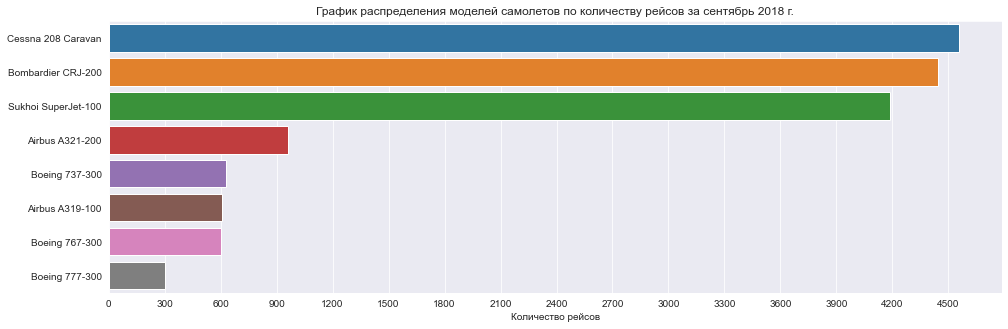

In [16]:
my_bar(models.flights_amount, models.model, 16, 5,\
       'График распределения моделей самолетов по количеству рейсов за сентябрь 2018 г.',\
       'Количество рейсов', 4601, 300)

Меньше всего рейсов в месяц делают более крупные самолеты с пассажировместимостью более 110 человек и максимальной дальностью полета более 4200 км. Более чем в 4.5 раза рейсов делают самолеты с пассажировместительностью до 110 человек и максимальной дальностью полета не превышающую 4600 км. Лидером по количеству рейсов является американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси с дальностью полета 1200 км и количеством пассажирских мест до 13. Наименее популярным самолетом является американский реактивный двухдвигательный широкофюзеляжный пассажирский самолет для авиалиний большой протяжённости, вместительностью от 368 до 451 пассажира и дальностью полета 7035 км.

Изучим график среднего количества рейсов в день по городам

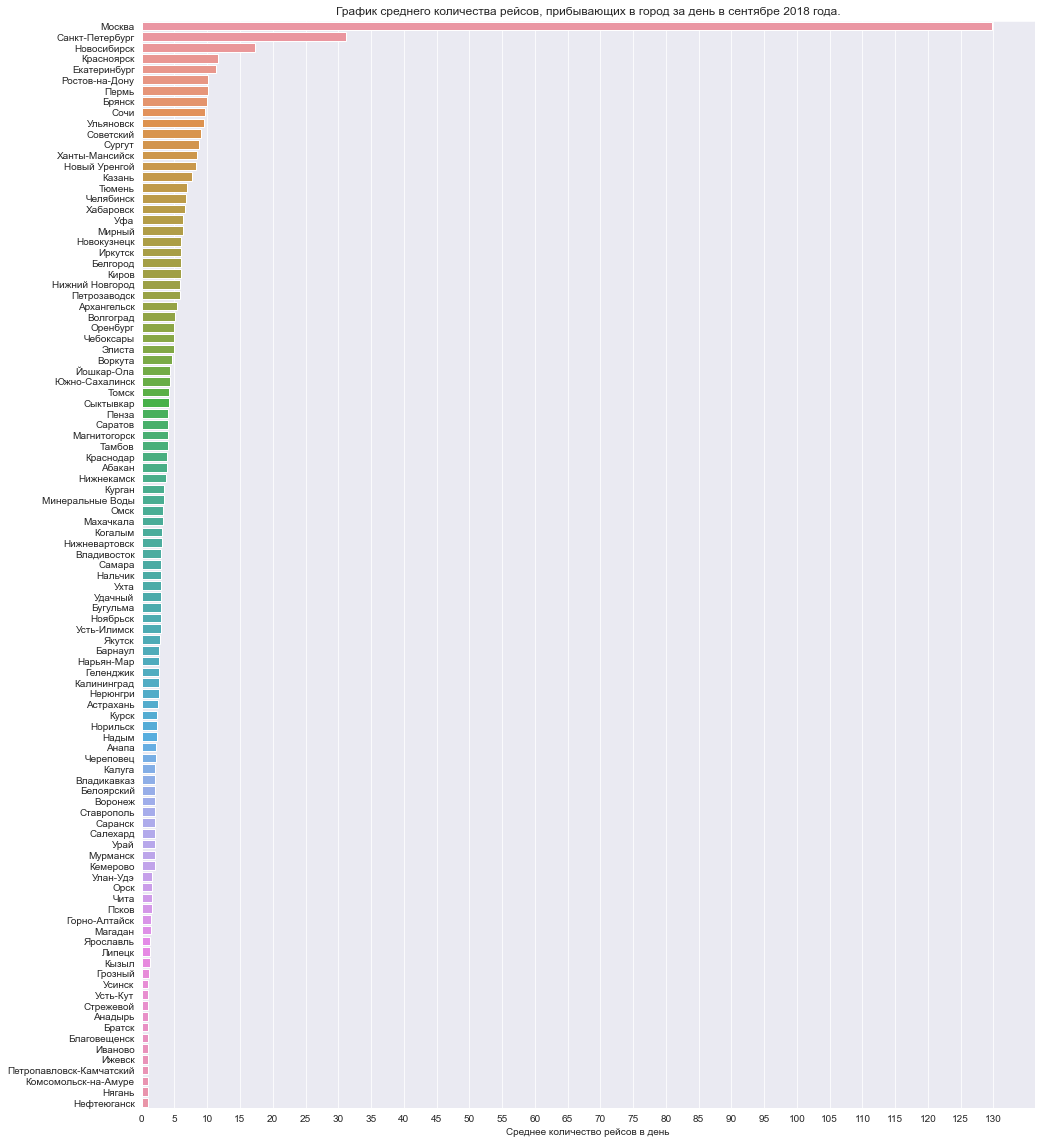

In [17]:
my_bar(cities.average_flights, cities.city, 16, 20,\
       'График среднего количества рейсов, прибывающих в город за день в сентябре 2018 года.',\
       'Среднее количество рейсов в день', 131, 5)

Несомненно большее количество рейсов в день приходится на три города лидируещих по количеству населения - Москва, Санкт-Петербург и Новосибирск. И делее в основном, чем меньше население города тем меньше рейсов делается, но не во всех случаях. Большое количество рейсов имеют города с небольшим населением, но представляющие ценность для отдыха и туризма, а так же крупно-промышленные города.

Изучим количество рейсов в день по округам

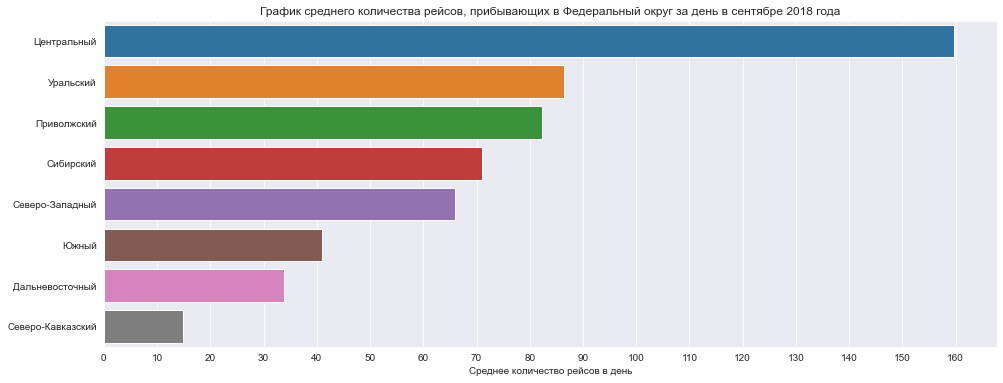

In [18]:
Federal_District = cities_with_coord.groupby('Федеральный округ')['average_flights'].sum().sort_values(ascending=False)

my_bar(Federal_District.values, Federal_District.index, 16, 6,\
       'График среднего количества рейсов, прибывающих в Федеральный округ за день в сентябре 2018 года',\
       'Среднее количество рейсов в день', 161, 10)

Из за большого количества рейсов в день в Москву, лидирует Центральный Федеральный округ - почти 160 рейсов в день. Примерно вдвое меньше рейсов (от 66 до 87) выполняется в Уральский ФО с Екатеринбургом из топ-10, в Приволжский ФО с Пермью и Ульяновском из топ-10, Сибирский ФО с Новосибирском из топ-3 и Красноярском из топ-10, а так же Северо-Западный ФО с г. Санкт-Петербург из топ-3. Меньше всего рейсов (от 14 до 42) делается в Южный ФО с Ростовом-на-Дону и Сочи из топ-10, в Дальневосточный ФО и Северокавказский ФО (наименьшее количество рейсов в день).

## Вывод

В нашем распоряжении было две таблицы за сентябрь 2018 года - модели самолетов с общим количеством сделанных рейсов и города с средним количеством рейсов в день. Изучив их, были сделаны следующие выводы:
- Наибольшее количество рейсов делают самолеты с небольшой пассажировместимостью и дальностью полета, включая российский самолет Sukhoi SuperJet-100
- В основном количество рейсов зависит от населения городов - чем больше население тем больше рейсов принимает город, но не во всех случаях. Большое количество рейсов так же имеют города с небольшим населением, но представляющие ценность для отдыха и туризма, а так же крупно-промышленные города.